In [2]:
#49.Identify the test name that had the shortest time duration.

import pandas as pd


df = pd.read_csv('test_measure.csv')


test_durations = df.groupby('ID_test')['time'].max()


shortest_test_id = test_durations.idxmin()
shortest_duration = test_durations.min()

print(f"The test with the shortest duration is ID_test = {shortest_test_id}, with a duration of {shortest_duration} seconds.")


The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.
The test with the shortest duration is ID_test = 564_1, with a duration of 495 seconds.


In [5]:
#50.What is the percentage difference in mean Carbon dioxide production between male and female athletes?

import pandas as pd


info = pd.read_csv('subject-info.csv')
measurements = pd.read_csv('test_measure.csv')


merged = pd.merge(measurements, info[['ID_test', 'Sex']], on='ID_test')


merged = merged.rename(columns={'Sex': 'is_female'})


merged = merged.dropna(subset=['VCO2'])


female_mean = merged[merged['is_female'] == 1]['VCO2'].mean()
male_mean = merged[merged['is_female'] == 0]['VCO2'].mean()

percent_diff = abs(female_mean - male_mean) / male_mean * 100


print(f"Mean VCO2 for females: {female_mean:.2f} mL/min")
print(f"Mean VCO2 for males: {male_mean:.2f} mL/min")
print(f"Percentage difference: {percent_diff:.2f}%")


Mean VCO2 for females: 1724.59 mL/min
Mean VCO2 for males: 2487.65 mL/min
Percentage difference: 30.67%


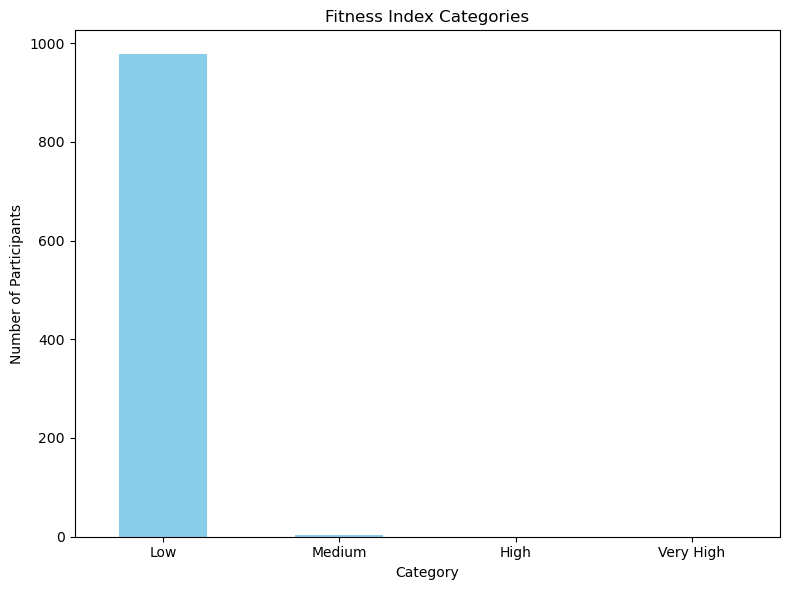

In [6]:
#51.Calculate the Fitness Index, generate a bar chart of Fitness Index categories, and export it as SVG file.

#import pandas as pd
import matplotlib.pyplot as plt


#info = pd.read_csv('subject-info.csv')
#measurements = pd.read_csv('test_measure.csv')


merged = pd.merge(measurements, info[['ID_test', 'Sex']], on='ID_test')

merged = merged.dropna(subset=['VO2', 'HR'])


fitness_data = merged.groupby('ID_test').agg({
    'VO2': 'max',  # Max VO2 (considered as VO2 max)
    'HR': 'max'    # Max HR (considered as HR at maximal effort)
}).reset_index()


fitness_data['Fitness_Index'] = fitness_data['VO2'] / fitness_data['HR']


bins = [0, 30, 50, 100, float('inf')]  # Define the categories (example ranges)
labels = ['Low', 'Medium', 'High', 'Very High']  # Define category labels
fitness_data['Category'] = pd.cut(fitness_data['Fitness_Index'], bins=bins, labels=labels, right=False)


category_counts = fitness_data['Category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Fitness Index Categories')
plt.xlabel('Category')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.tight_layout()


plt.savefig('fitness_index_categories.svg', format='svg')


plt.show()


In [9]:
#52. arr=np.array([
  #  [3, 5, 7, 9],   
  #  [2, 0, 8, 10],  
  #  [1, 4, 8, 12],  
   # [5, 9, 14, 15]  
#] )

import numpy as np


arr = np.array([
    [3, 5, 7, 9],   
    [2, 0, 8, 10],  
    [1, 4, 8, 12],  
    [5, 9, 14, 15]
])


transposed_arr = arr.T


row_sums = np.sum(transposed_arr, axis=1)


max_row_index = np.argmax(row_sums)


print("Transposed Matrix:")
print(transposed_arr)
print("\nSum of each row after transposing:", row_sums)
print(f"\nRow with the highest sum: Row {max_row_index + 1} (0-indexed: {max_row_index}), Sum: {row_sums[max_row_index]}")


Transposed Matrix:
[[ 3  2  1  5]
 [ 5  0  4  9]
 [ 7  8  8 14]
 [ 9 10 12 15]]

Sum of each row after transposing: [11 18 37 46]

Row with the highest sum: Row 4 (0-indexed: 3), Sum: 46


In [4]:
#53.Display participant details with highest average cardiorespiratory fitness in terms of VO2 max.
#import pandas as pd


#info = pd.read_csv('subject-info.csv')
#measurements = pd.read_csv('test_measure.csv')


merged = pd.merge(measurements, info[['ID_test', 'ID', 'Age', 'Weight', 'Height', 'Sex']], on='ID_test')


print("Merged DataFrame Head:")
print(merged.head())

merged = merged.dropna(subset=['VO2'])


participant_vo2_max = merged.groupby('ID_x')['VO2'].max().reset_index()


participant_details = pd.merge(participant_vo2_max, info[['ID', 'Age', 'Weight', 'Height', 'Sex']], left_on='ID_x', right_on='ID')


best_participant = participant_details.loc[participant_details['VO2'].idxmax()]


print(f"Participant with highest VO2 max:")
print(best_participant)
import pandas as pd


info = pd.read_csv('subject-info.csv')
measurements = pd.read_csv('test_measure.csv')


merged = pd.merge(measurements, info[['ID_test', 'ID', 'Age', 'Weight', 'Height', 'Sex']], on='ID_test')


print("Merged DataFrame Head:")
print(merged.head())


merged = merged.dropna(subset=['VO2'])


participant_vo2_max = merged.groupby('ID_x')['VO2'].max().reset_index()


participant_details = pd.merge(participant_vo2_max, info[['ID', 'Age', 'Weight', 'Height', 'Sex']], left_on='ID_x', right_on='ID')


best_participant = participant_details.loc[participant_details['VO2'].idxmax()]


print(f"Participant with highest VO2 max:")
print(best_participant)


Merged DataFrame Head:
   time  Speed    HR    VO2   VCO2  RR    VE ID_test  ID_x  ID_y   Age  \
0     0    5.0  63.0  478.0  360.0  27  13.3     2_1     2     2  33.8   
1     2    5.0  75.0  401.0  295.0  23  10.3     2_1     2     2  33.8   
2     4    5.0  82.0  449.0  319.0  29  12.2     2_1     2     2  33.8   
3     7    5.0  87.0  461.0  340.0  28  12.8     2_1     2     2  33.8   
4     9    5.0  92.0  574.0  417.0  28  14.6     2_1     2     2  33.8   

   Weight  Height  Sex  
0    68.0   171.1    0  
1    68.0   171.1    0  
2    68.0   171.1    0  
3    68.0   171.1    0  
4    68.0   171.1    0  
Participant with highest VO2 max:
ID_x       409.0
VO2       6217.0
ID         409.0
Age         23.6
Weight      86.0
Height     190.0
Sex          0.0
Name: 465, dtype: float64
Merged DataFrame Head:
   time  Speed    HR    VO2   VCO2  RR    VE ID_test  ID_x  ID_y   Age  \
0     0    5.0  63.0  478.0  360.0  27  13.3     2_1     2     2  33.8   
1     2    5.0  75.0  401.0  295

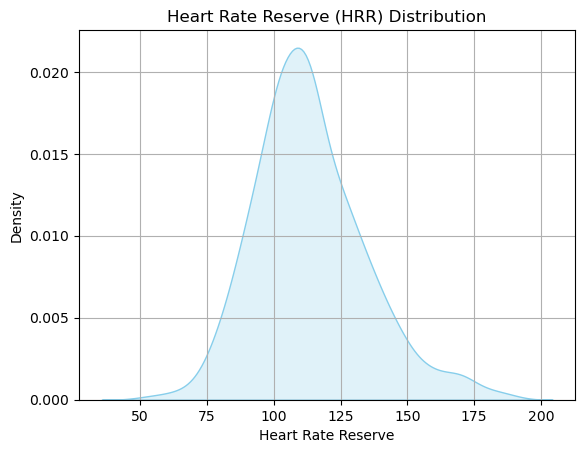

In [3]:
#54.calculate the heart rate reserve and show the distribution as density plot 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


info = pd.read_csv('subject-info.csv')
measurements = pd.read_csv('test_measure.csv')


merged = pd.merge(measurements, info[['ID_test', 'ID']], on='ID_test')


merged = merged.dropna(subset=['HR'])


merged = merged.rename(columns={'ID_x': 'ID'})


hr_stats = merged.groupby('ID')['HR'].agg(HR_max='max', HR_rest='min').reset_index()


hr_stats['HRR'] = hr_stats['HR_max'] - hr_stats['HR_rest']


sns.kdeplot(data=hr_stats, x='HRR', fill=True, color='skyblue')
plt.title('Heart Rate Reserve (HRR) Distribution')
plt.xlabel('Heart Rate Reserve')
plt.ylabel('Density')
plt.grid(True)
plt.show()

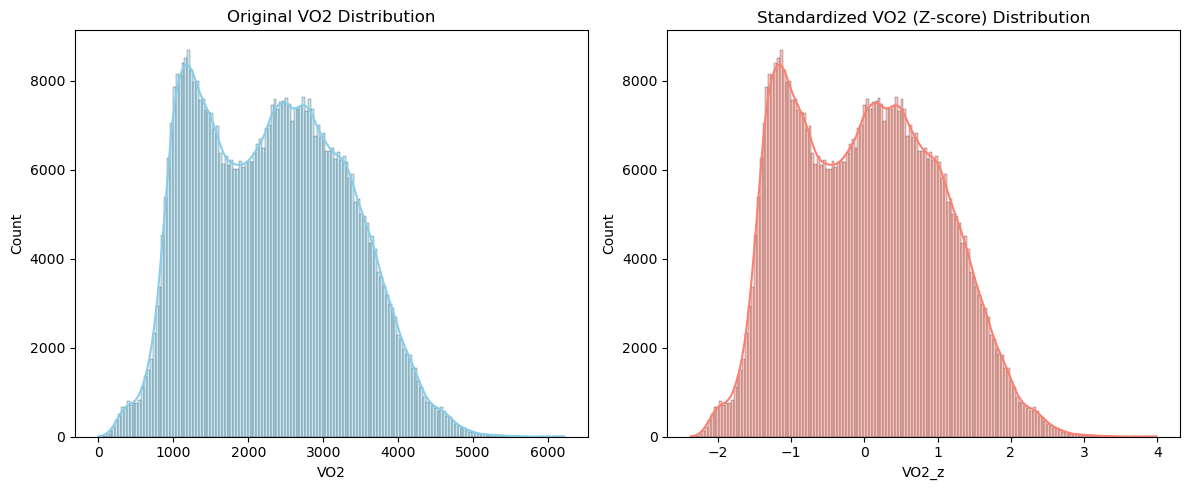

In [1]:
#56.Choose any feature that follows a Gaussian distribution, convert it into a standard normal distribution, and visualize the results?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore


measurements = pd.read_csv('test_measure.csv')


measurements = measurements.dropna(subset=['VO2'])


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(measurements['VO2'], kde=True, color='skyblue')
plt.title('Original VO2 Distribution')


measurements['VO2_z'] = zscore(measurements['VO2'])


plt.subplot(1, 2, 2)
sns.histplot(measurements['VO2_z'], kde=True, color='salmon')
plt.title('Standardized VO2 (Z-score) Distribution')

plt.tight_layout()
plt.show()


In [4]:
#57.Identify the participant who has taken maximum number of Graded Exercise test and justify.
import pandas as pd


df = pd.read_csv('test_measure.csv')


df = df.dropna(subset=['ID', 'ID_test'])


test_counts = df.groupby('ID')['ID_test'].nunique().reset_index()
test_counts.columns = ['ID', 'Number_of_Tests']


max_tests = test_counts['Number_of_Tests'].max()
top_participants = test_counts[test_counts['Number_of_Tests'] == max_tests]


print("Participant(s) with the maximum number of Graded Exercise Tests:")
print(top_participants)


Participant(s) with the maximum number of Graded Exercise Tests:
      ID  Number_of_Tests
505  506                5


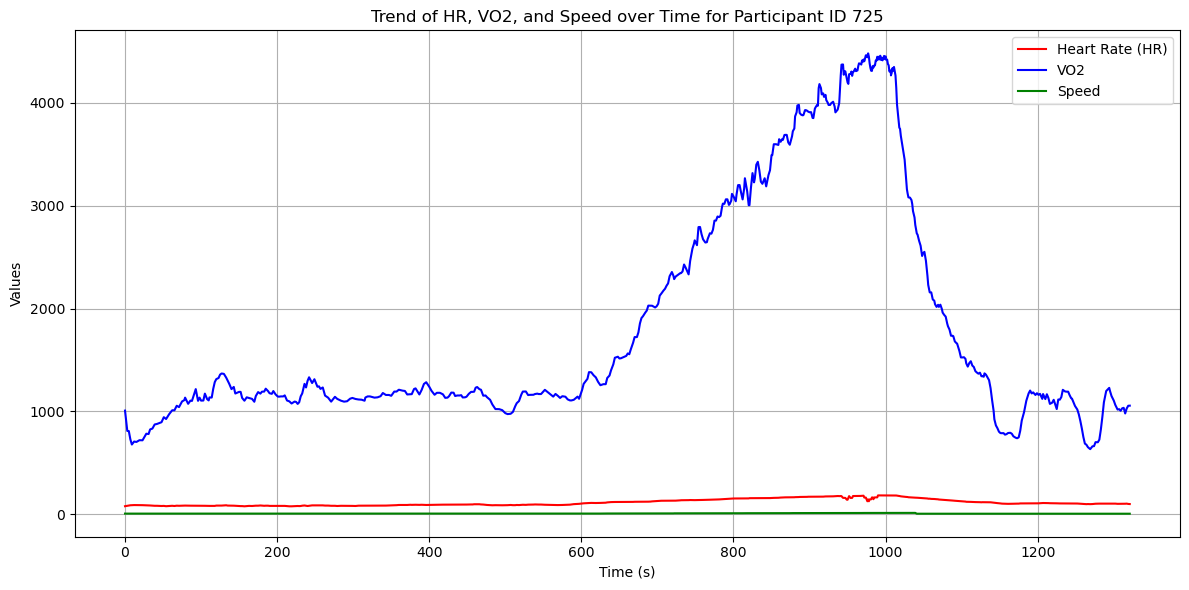

In [14]:
#58.For participant ID 725 show trend of  any three variables against time in a single canva ?
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('test_measure.csv')


participant_725 = df[df['ID'] == 725]


participant_725 = participant_725.dropna(subset=['time', 'HR', 'VO2', 'Speed'])


plt.figure(figsize=(12, 6))

plt.plot(participant_725['time'], participant_725['HR'], label='Heart Rate (HR)', color='red')
plt.plot(participant_725['time'], participant_725['VO2'], label='VO2', color='blue')
plt.plot(participant_725['time'], participant_725['Speed'], label='Speed', color='green')


plt.title('Trend of HR, VO2, and Speed over Time for Participant ID 725')
plt.xlabel('Time (s)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()


plt.show()


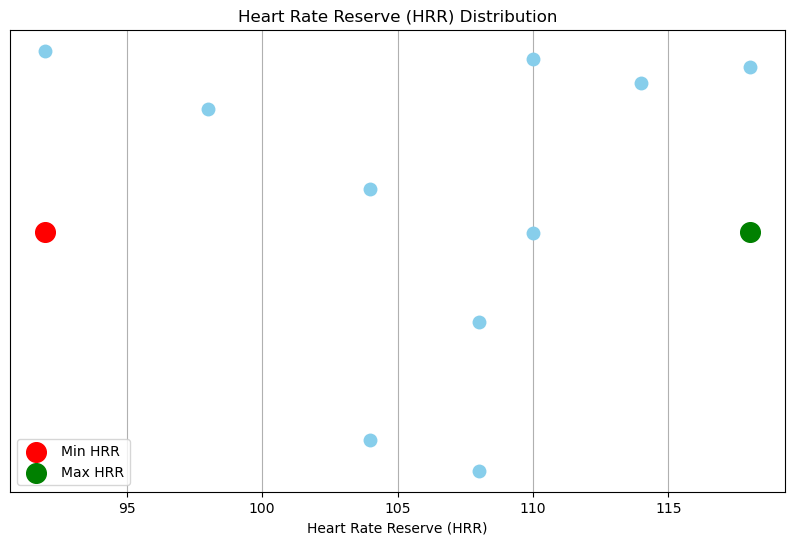

In [16]:
#60.Use a strip plot to illustrate the distribution of Heart Rate Reserve (HRR) values, highlighting the lowest and highest values to showcase the range of HRR.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = {
    'ID': range(1, 11),
    'HR_max': [180, 175, 190, 160, 170, 185, 178, 165, 172, 169],
    'HR_rest': [70, 65, 72, 68, 66, 71, 70, 67, 64, 65]
}
hr_stats = pd.DataFrame(data)


hr_stats['HRR'] = hr_stats['HR_max'] - hr_stats['HR_rest']


min_hrr = hr_stats['HRR'].min()
max_hrr = hr_stats['HRR'].max()


plt.figure(figsize=(10, 6))
sns.stripplot(x='HRR', data=hr_stats, size=10, color='skyblue', jitter=True)


plt.scatter(hr_stats[hr_stats['HRR'] == min_hrr]['HRR'], [0], color='red', s=200, label='Min HRR')
plt.scatter(hr_stats[hr_stats['HRR'] == max_hrr]['HRR'], [0], color='green', s=200, label='Max HRR')


plt.title('Heart Rate Reserve (HRR) Distribution')
plt.xlabel('Heart Rate Reserve (HRR)')
plt.yticks([])
plt.legend()
plt.grid(True)
plt.show()


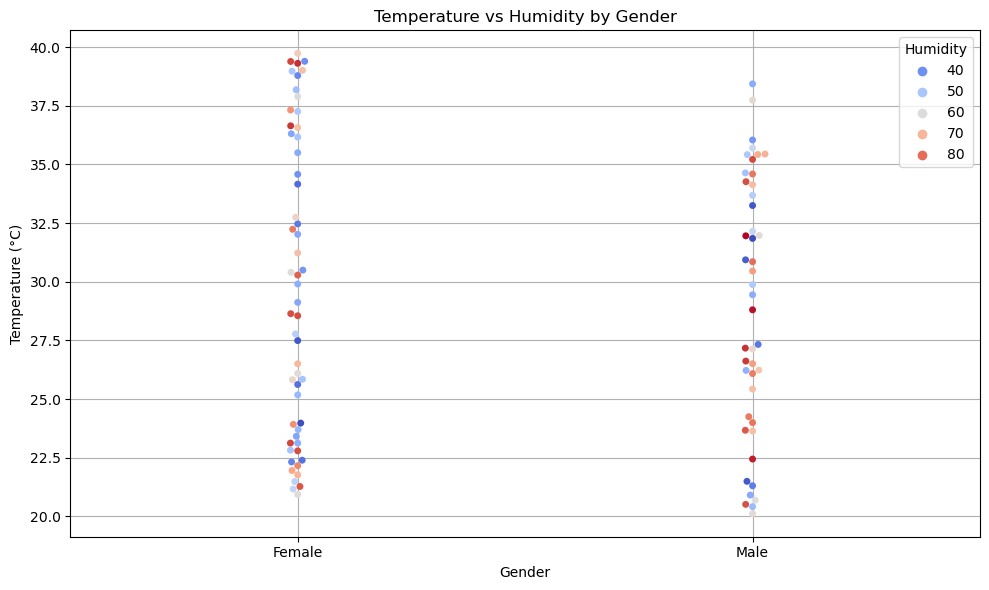

In [17]:
#61.Create a swarm plot to visualize the relationship between humidity and temperature for each gender.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample DataFrame (replace with your actual data if available)
np.random.seed(42)
data = {
    'Temperature': np.random.uniform(20, 40, 100),      # in °C
    'Humidity': np.random.uniform(30, 90, 100),         # in %
    'Sex': np.random.choice(['Male', 'Female'], 100)    # gender category
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Sex', y='Temperature', hue='Humidity', data=df, palette='coolwarm')

# Customization
plt.title('Temperature vs Humidity by Gender')
plt.ylabel('Temperature (°C)')
plt.xlabel('Gender')
plt.legend(title='Humidity')
plt.grid(True)
plt.tight_layout()
plt.show()


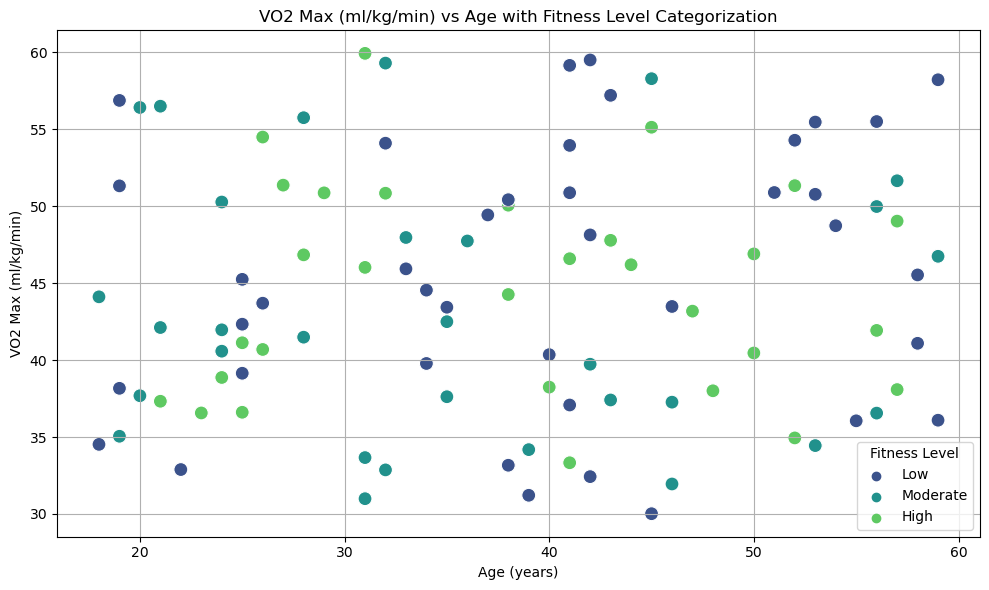

In [18]:
#62.Analyze the relationship between fitness levels and physiological attributes and identify trends in the scatter plot of VO2 max (ml/kg/min) versus age
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(42)
data = {
    'Age': np.random.randint(18, 60, 100),              # Age of participants
    'VO2_max': np.random.uniform(30, 60, 100),          # VO2 max (ml/kg/min)
    'Fitness_Level': np.random.choice(['Low', 'Moderate', 'High'], 100)  # Fitness levels
}
df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='VO2_max', hue='Fitness_Level', data=df, palette='viridis', s=100, edgecolor='w')


plt.title('VO2 Max (ml/kg/min) vs Age with Fitness Level Categorization')
plt.xlabel('Age (years)')
plt.ylabel('VO2 Max (ml/kg/min)')
plt.legend(title='Fitness Level')
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#64.
import numpy as np
import time

# Create a large array with 10 million elements
arr = np.random.rand(10**7)

# Measure time for explicit loop
start_time_loop = time.time()

result_loop = np.zeros_like(arr)  # Create an empty array to store results
for i in range(len(arr)):
    result_loop[i] = arr[i] * 2

end_time_loop = time.time()
loop_time = end_time_loop - start_time_loop

# Measure time for vectorized operation
start_time_vectorized = time.time()

result_vectorized = arr * 2  # Vectorized multiplication by 2

end_time_vectorized = time.time()
vectorized_time = end_time_vectorized - start_time_vectorized

# Print the results
print(f"Time using explicit loop: {loop_time:.6f} seconds")
print(f"Time using vectorized operation: {vectorized_time:.6f} seconds")


Time using explicit loop: 3.553388 seconds
Time using vectorized operation: 0.043711 seconds


In [3]:
59.
import pandas as pd
import random
import altair as alt

# Enable renderer for Jupyter
alt.renderers.enable('default')  # or try 'notebook' if needed

# Generate sample data
num_points = 100
x_values_random = [random.random() for _ in range(num_points)]
y_values_random = [random.uniform(0, 10) for _ in range(num_points)]

# Create DataFrame
temp_df = pd.DataFrame({
    'x': x_values_random,
    'y': y_values_random
})

# Create scatter plot
scatter_plot = alt.Chart(temp_df, title="Scatter Plot with Regression").mark_point().encode(
    x='x',
    y='y'
)

# Regression line
regression_line = alt.Chart(temp_df).transform_regression('x', 'y').mark_line(color='red')

# Combine and show
(scatter_plot + regression_line).interactive()


alt.LayerChart(...)